In [13]:
import math
import matplotlib.cm as cm

from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as c

In [14]:
# set up data
data = [(0., 0.),
        (1., 0.5),
        (2., 1),
        (3., 2),
        (4., 1),
        (6., 1.5),
        (8., 0.5)]

x_train = np.array([d[0] for d in data])
y_train = np.array([d[1] for d in data])

x_test = np.arange(0, 12, .1)

In [15]:

print("y is:")
print(y_train)

y is:
[0.  0.5 1.  2.  1.  1.5 0.5]


In [117]:
def predict_knn(k=1, tau=1):
    """Returns predictions for the values in x_test, using KNN predictor with the specified k."""
    #heap to store distances
    
    def predict_x(x_star):
        
        def K(x_i, x_j):
            return np.exp(-np.power((x_i-x_j), 2)/tau)
        
        d = []
        
        for x, y in zip(x_train, y_train):
#             print(x, y)
            d.append((K(x_star, x), y))
            
        d.sort(reverse= True)
#         print(d)
        return sum(x[1] for x in d[:k])/k
    
    y = []
    for x in x_test:
        y.append(predict_x(x))
#     print(y)
    return np.vectorize(predict_x)(x_test)

In [118]:
x_test

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9])

In [119]:
predict_knn(k = 4)

array([0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875,
       0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875,
       0.875, 0.875, 1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 1.125,
       1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 1.375,
       1.375, 1.375, 1.375, 1.375, 1.375, 1.375, 1.375, 1.375, 1.375,
       1.375, 1.375, 1.375, 1.375, 1.375, 1.375, 1.25 , 1.25 , 1.25 ,
       1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 ,
       1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 ,
       1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 ,
       1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 ,
       1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 ,
       1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 ,
       1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 , 1.25 ,
       1.25 , 1.25 , 1.25 ])

In [120]:

def plot_knn_preds(k):
    plt.xlim([0, 12])
    plt.ylim([0,3])
    
    y_test = predict_knn(k=k)
    
    plt.scatter(x_train, y_train, label = "training data", color = 'black')
    plt.plot(x_test, y_test, label = "predictions using k = " + str(k))

    plt.legend()
    plt.title("KNN Predictions with k = " + str(k))
    plt.savefig('k' + str(k) + '.png')
    plt.show()


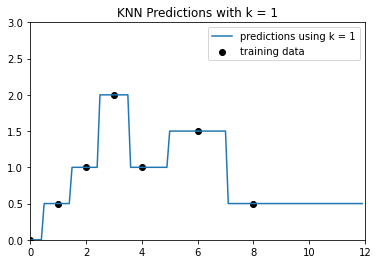

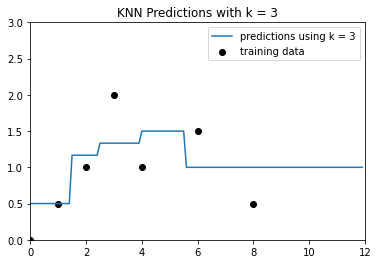

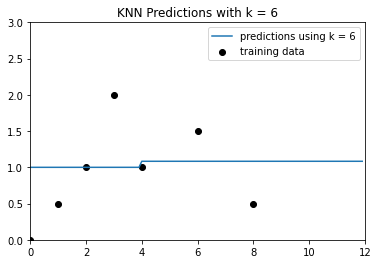

In [121]:
for k in (1, 3, len(x_train)-1):
    plot_knn_preds(k)